In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [2]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/Final Sem Internship/kagglecatsanddogs_5340.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [3]:
path = '/content/drive/MyDrive/Final Sem Internship/kagglecatsanddogs_5340'
classes = os.listdir(path)
classes


['readme[1].txt', 'CDLA-Permissive-2.0.pdf', 'PetImages', 'Cat', 'Dog']

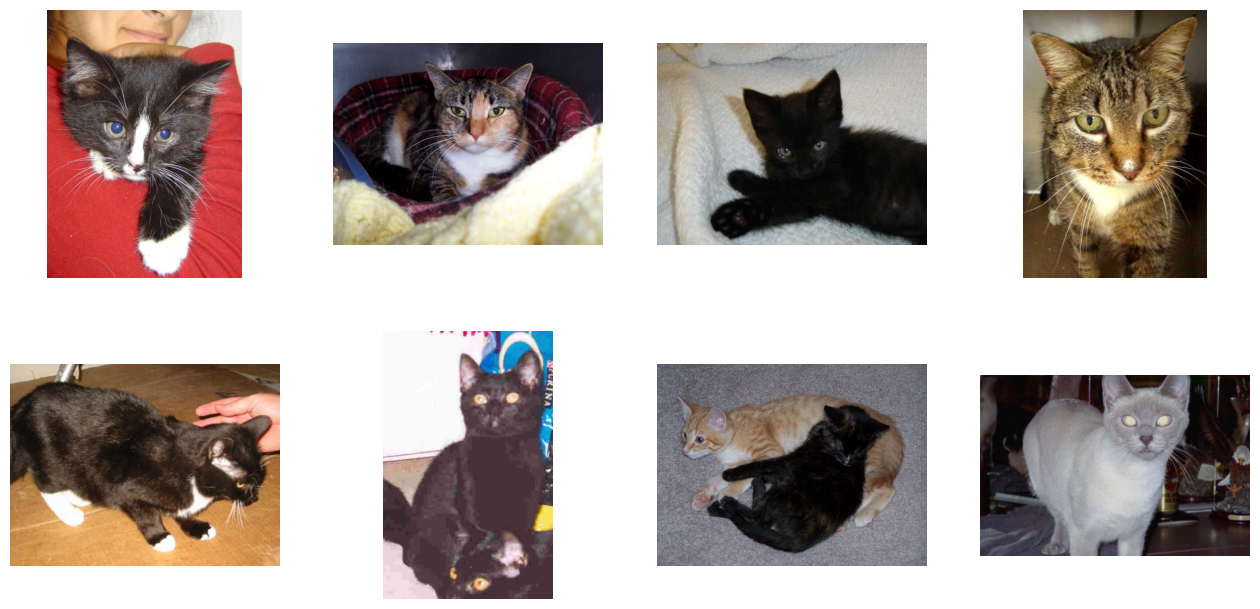

In [5]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/drive/MyDrive/Final Sem Internship/kagglecatsanddogs_5340/Cat')
dog_dir = os.path.join('/content/drive/MyDrive/Final Sem Internship/kagglecatsanddogs_5340/Dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [6]:
base_dir = '/content/drive/MyDrive/Final Sem Internship/kagglecatsanddogs_5340'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 1668 files belonging to 3 classes.
Using 1502 files for training.
Found 1668 files belonging to 3 classes.
Using 166 files for validation.


In [7]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

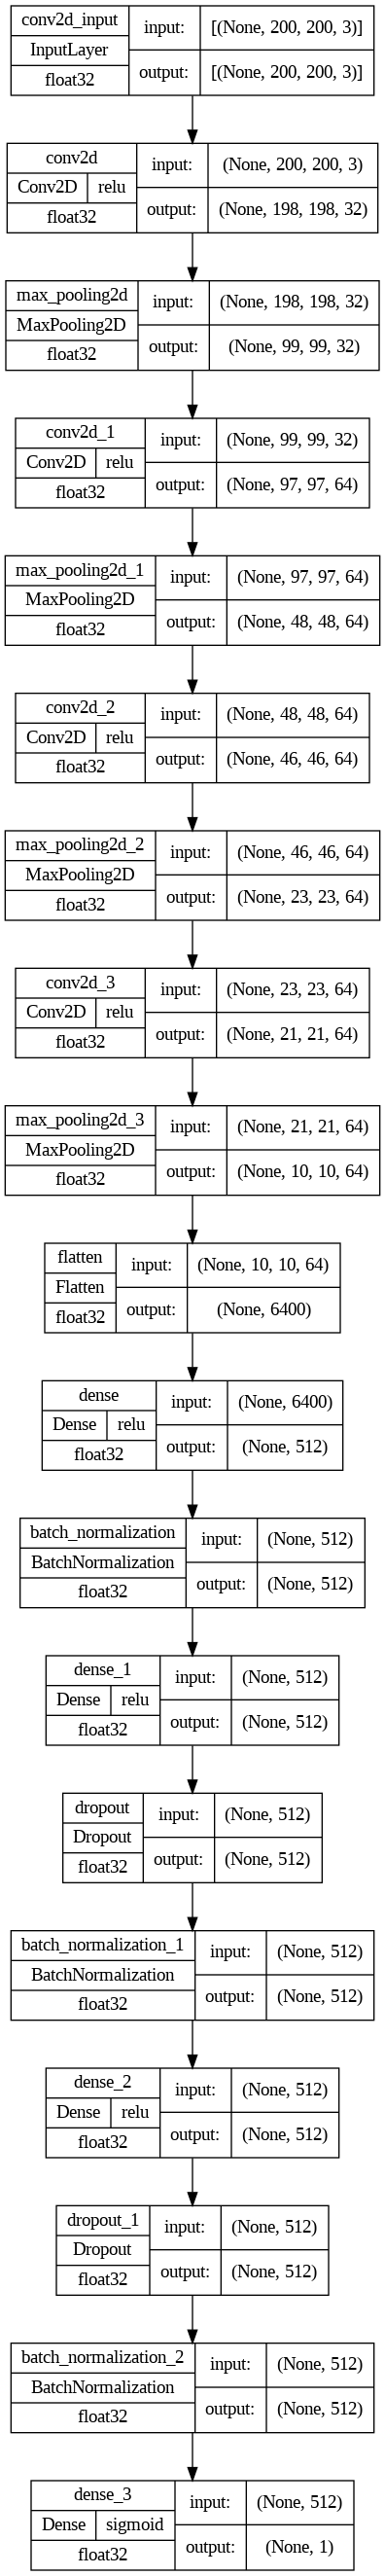

In [9]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [13]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [14]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)


Epoch 1/10
47/47 [==============================] - 129s 3s/step - loss: 0.0163 - accuracy: 0.9987 - val_loss: 1.6713e-04 - val_accuracy: 1.0000
Epoch 2/10
47/47 [==============================] - 128s 3s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.1501e-04 - val_accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 130s 3s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.3209e-04 - val_accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 125s 3s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 5.1274e-04 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 122s 3s/step - loss: 7.2296e-04 - accuracy: 1.0000 - val_loss: 3.6879e-04 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 124s 3s/step - loss: 4.9673e-04 - accuracy: 1.0000 - val_loss: 2.9944e-04 - val_accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 125s 3s/step - loss: 3.7099e-04 - accuracy: 1.0000 - val_loss: 1.9554e

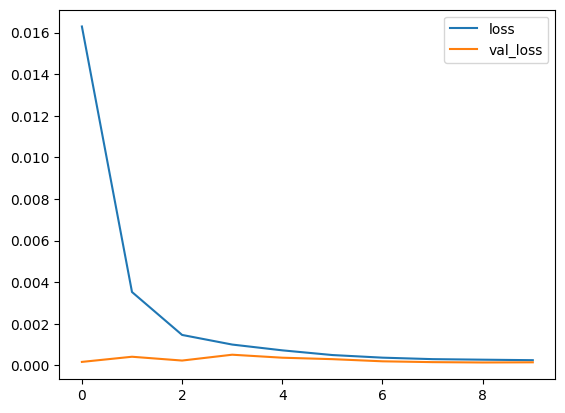

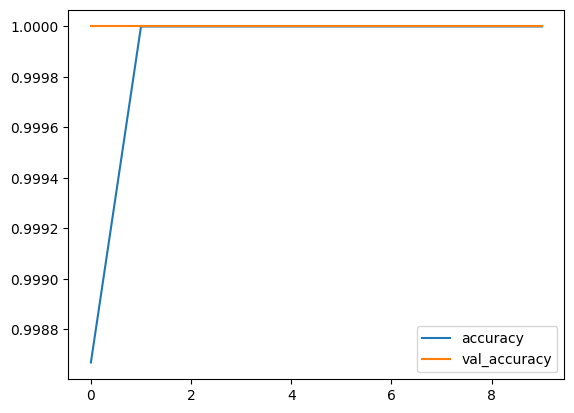

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [20]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/drive/MyDrive/Final Sem Internship/Cat-Dog-CNN-Classifier-master/resources/images/output_28_0.png',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
   print("Dog")
else:
   print("Cat")


FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'

In [18]:
test_image = image.load_img('/content/drive/MyDrive/Final Sem Internship/Cat-Dog-CNN-Classifier-master/resources/images/output_26_0.png', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")


NameError: name 'image' is not defined